<div style="background-color: skyblue; color: #1434A4; border-radius: 32px; height: 50px">
    <center><h1 style="display:block; padding:7px">IMPORTING LIBRARIES</h1></center>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('darkgrid')
# import cv2
import itertools

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation,Dropout
from keras.models import Model, Sequential
# from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix,classification_report
import imageio
import matplotlib.image as img

import os 
import pathlib 

from tensorflow.keras.applications import imagenet_utils

<div style="background-color: skyblue; color: #1434A4; border-radius: 32px; height: 50px">
    <center><h1 style="display:block; padding:7px">LOADING DATASET</h1></center>
</div>

In [2]:
path = pathlib.Path("/kaggle/input/5-flower-types-classification-dataset/flower_images")

In [3]:
lilly = list(path.glob('Lilly/*'))[:1000]
lotus = list(path.glob('Lotus/*'))[:1000]
orchid = list(path.glob('Orchid/*'))[:1000]
sunflower = list(path.glob('Sunflower/*'))[:1000]
tulip = list(path.glob('Tulip/*'))[:1000]

In [4]:
data = {
    'lilly' : lilly,
    'lotus' : lotus,
    'orchid' : orchid,
    'sunflower' : sunflower,
    'tulip': tulip
}
flower_labels= {k:v for k,v in enumerate(data.keys())}

<div style="background-color: skyblue; color: #1434A4; border-radius: 32px; height: 50px">
    <center><h1 style="display:block; padding:7px"> Visualization</h1></center>
</div>

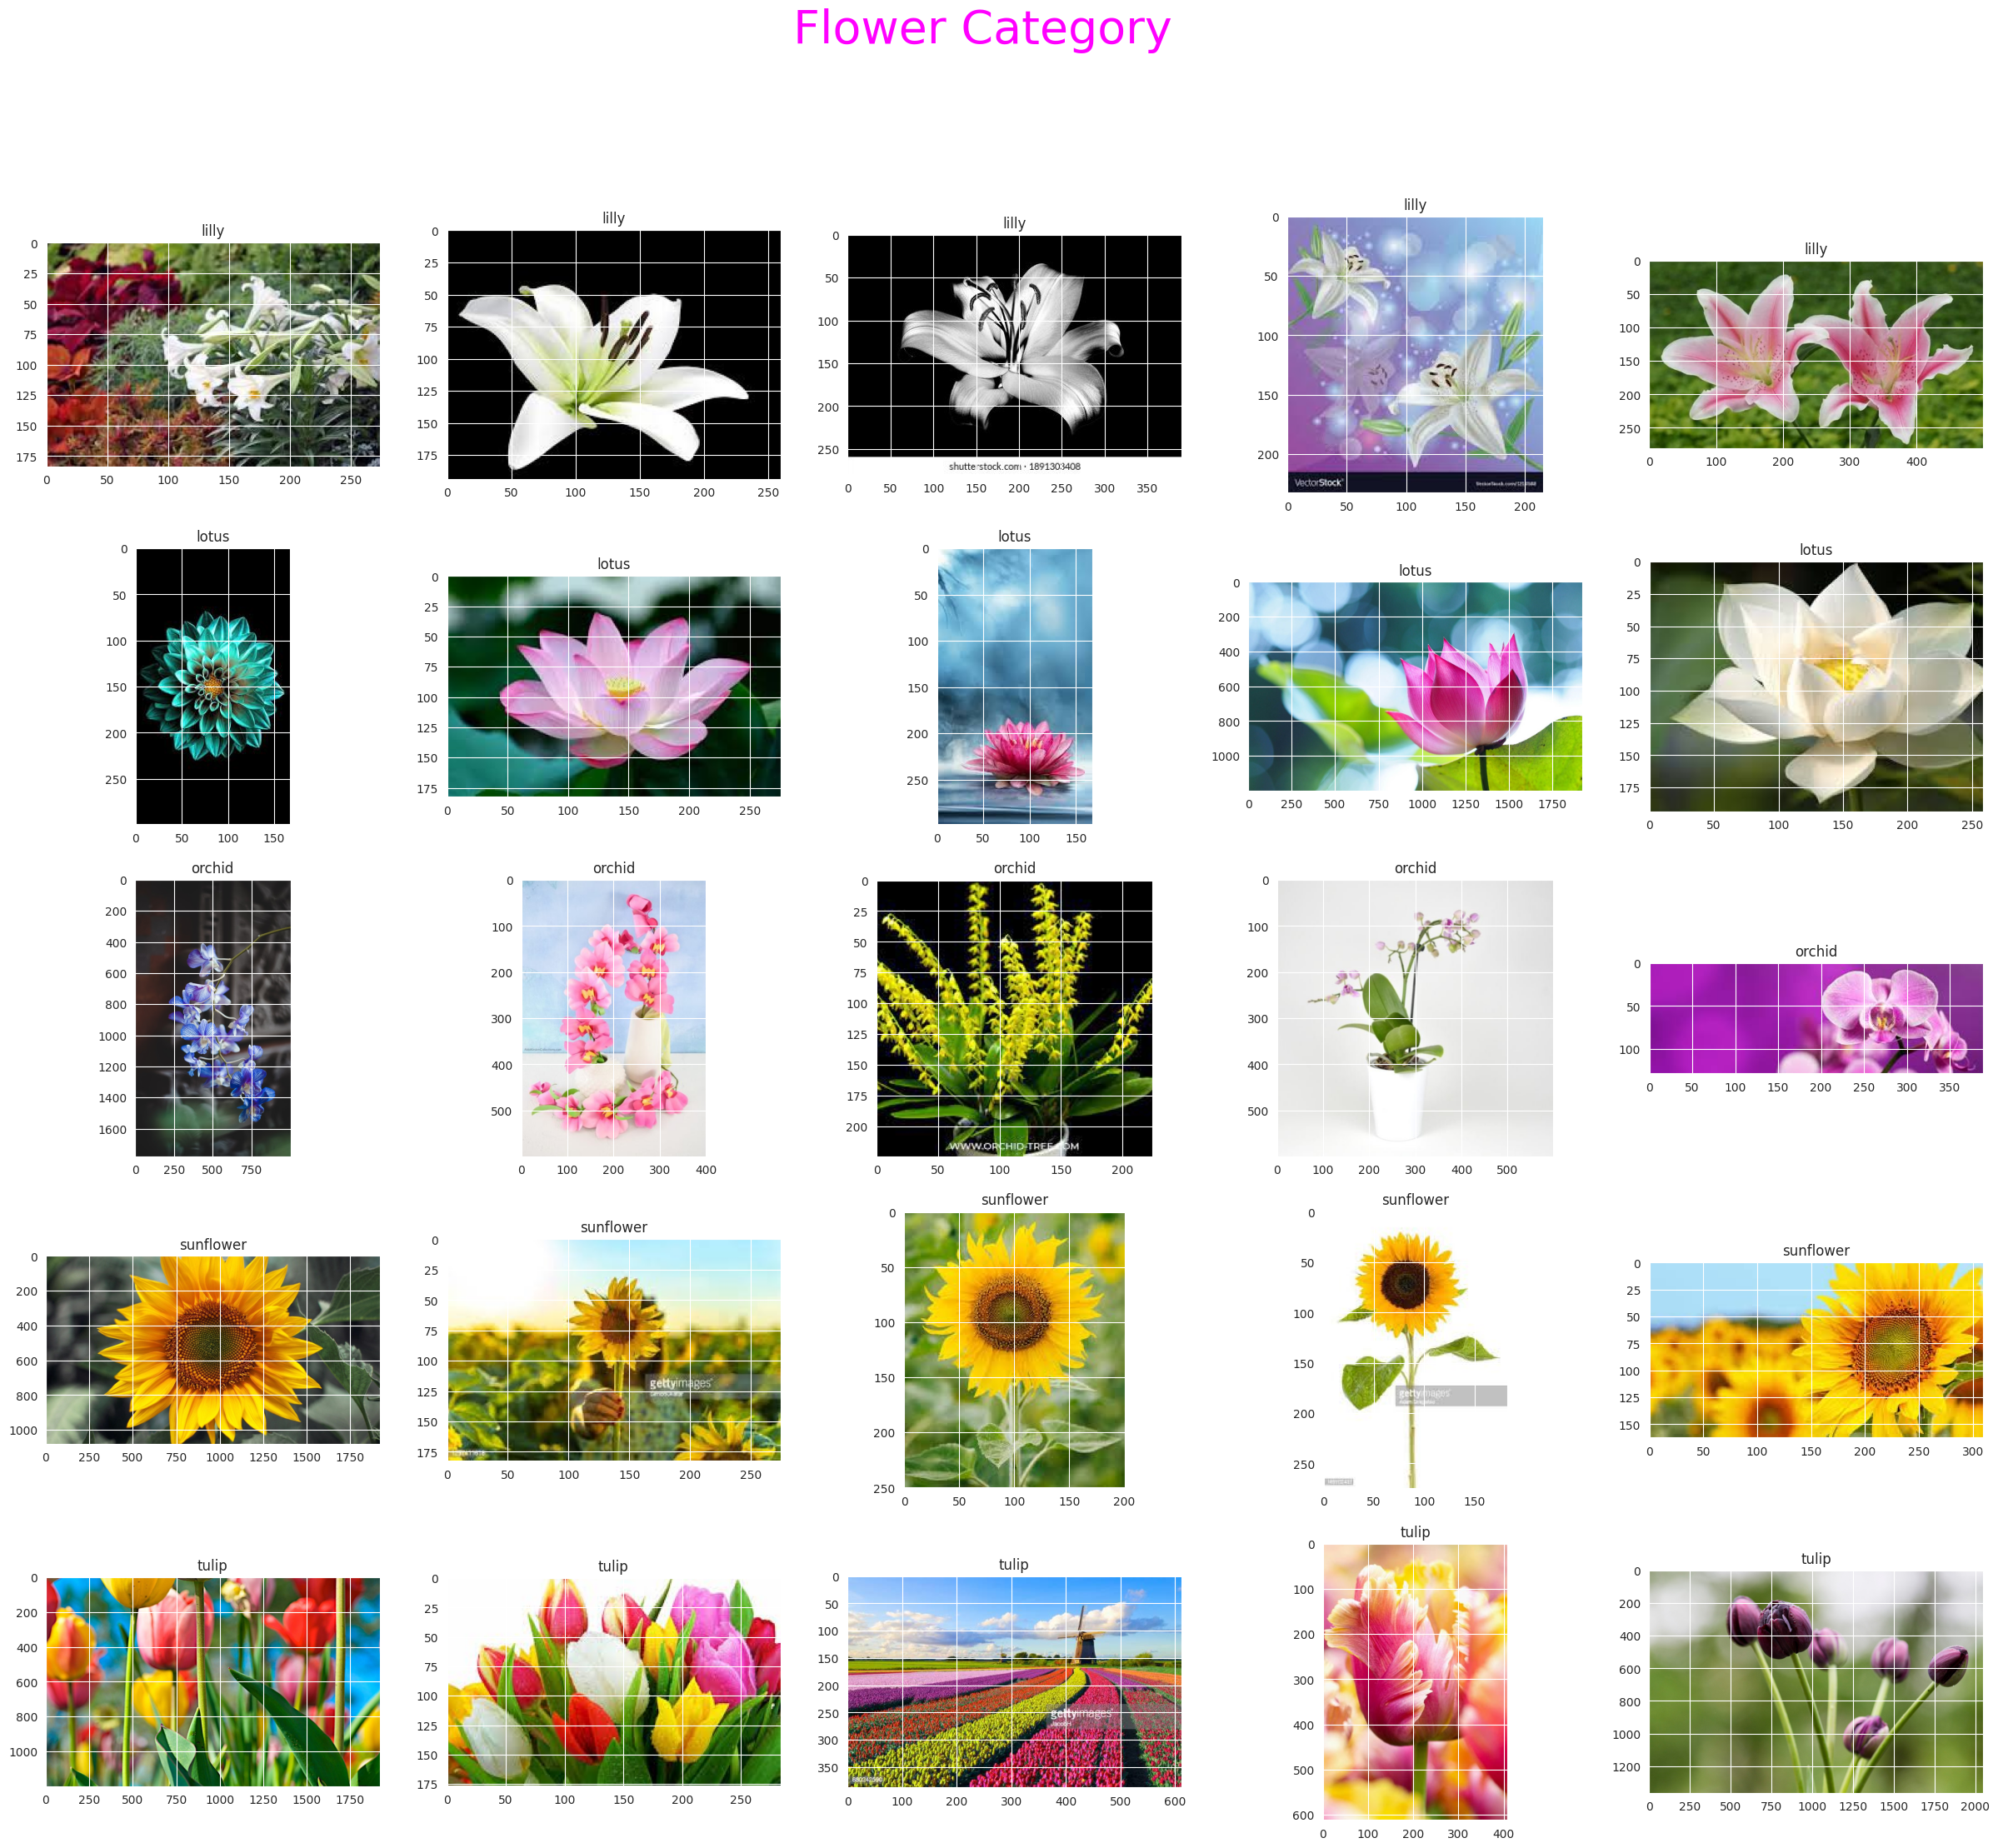

In [5]:
fig, ax = plt.subplots(5,5, figsize=(30,25))
fig.suptitle('Flower Category',color='magenta',fontsize=40)
for i in range(5):
    for j in range(5):
        image = img.imread(data.get(flower_labels.get(i))[j])
        ax[i, j].imshow(image)
        ax[i, j].set_title(flower_labels.get(i))

<div style="background-color: skyblue; color: #1434A4; border-radius: 32px; height: 50px">
    <center><h1 style="display:block; padding:7px"> Train & Test Definition</h1></center>
</div>

In [6]:
train_gen=ImageDataGenerator(rotation_range=10,
                                rescale = 1./255,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                horizontal_flip=True,
                                vertical_flip=False,
                                zoom_range=0.1,
                                shear_range=0.1,
                                brightness_range=[0.8, 1.2],
                                fill_mode='nearest',
                                validation_split=0.2  # set validation split to 20% 
                                )
train_data=train_gen.flow_from_directory("/kaggle/input/5-flower-types-classification-dataset/flower_images",target_size=(224,224),batch_size=32,
                                         class_mode='categorical',
                                         shuffle=True,
                                         subset='training')
test_data=train_gen.flow_from_directory("/kaggle/input/5-flower-types-classification-dataset/flower_images",target_size=(224,224),batch_size=1,
                                        shuffle=False,subset='validation')

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


<div style="background-color: skyblue; color: #1434A4; border-radius: 32px; height: 50px">
    <center><h1 style="display:block; padding:7px"> Creating CNN Model</h1></center>
</div> 

In [7]:
def plot(c):
    plt.plot(c.history.history['accuracy'],marker='o',color='red',markersize=10)
    plt.plot(c.history.history['val_accuracy'],marker='*',color='green',markersize=10)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(c.history.history['loss'],marker='o',color='red',markersize=10)
    plt.plot(c.history.history['val_loss'],marker='*',color='green',markersize=10)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()

In [8]:
cnn=keras.models.Sequential()
cnn.add(keras.layers.Conv2D(filters=32,kernel_size=3,
                            padding='valid',activation='relu',input_shape=(224,224,3)))
cnn.add(keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(45,activation='relu'))
cnn.add(keras.layers.Dense(15,activation='relu'))
cnn.add(keras.layers.Dropout(rate= 0.1, seed= 100))
cnn.add(keras.layers.Dense(units=5,activation='sigmoid'))

In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 45)                17742285  
                                                                 
 dense_1 (Dense)             (None, 15)                690       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                        

In [10]:
cnn.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [11]:
cnn.fit(train_data,epochs=20,validation_data=test_data,shuffle=True,
         callbacks=keras.callbacks.EarlyStopping(monitor="val_loss",patience=10))

Epoch 1/20
125/125 [==============================] - 111s 836ms/step - loss: 2.5243 - accuracy: 0.3277 - val_loss: 1.3467 - val_accuracy: 0.4720
Epoch 2/20
125/125 [==============================] - 77s 615ms/step - loss: 1.3649 - accuracy: 0.4417 - val_loss: 1.2792 - val_accuracy: 0.5050
Epoch 3/20
125/125 [==============================] - 76s 611ms/step - loss: 1.3045 - accuracy: 0.4572 - val_loss: 1.2100 - val_accuracy: 0.5030
Epoch 4/20
125/125 [==============================] - 78s 622ms/step - loss: 1.2566 - accuracy: 0.4848 - val_loss: 1.2173 - val_accuracy: 0.5210
Epoch 5/20
125/125 [==============================] - 76s 609ms/step - loss: 1.2193 - accuracy: 0.4970 - val_loss: 1.1607 - val_accuracy: 0.5050
Epoch 6/20
125/125 [==============================] - 77s 616ms/step - loss: 1.1927 - accuracy: 0.5038 - val_loss: 1.1406 - val_accuracy: 0.5490
Epoch 7/20
125/125 [==============================] - 76s 610ms/step - loss: 1.1555 - accuracy: 0.5315 - val_loss: 1.1376 - val_a

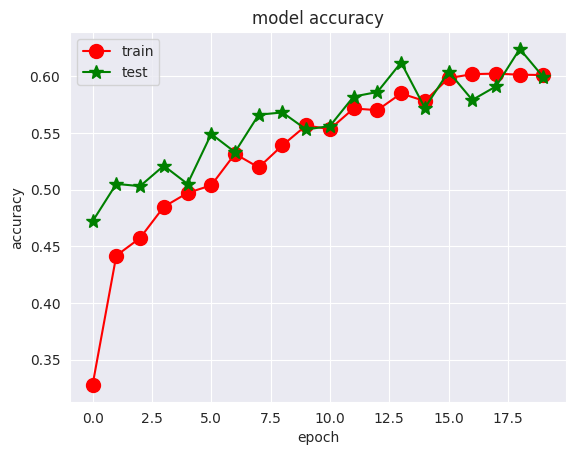

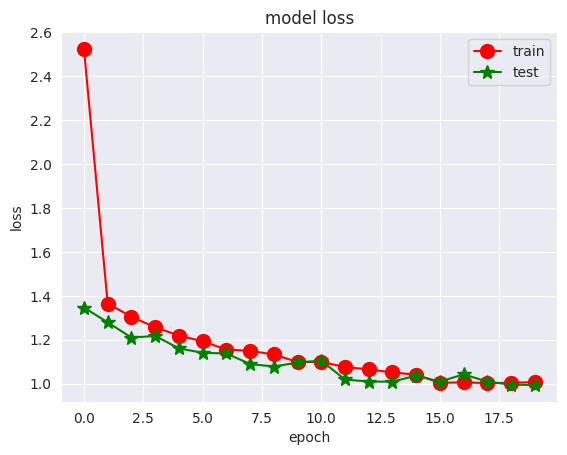

In [12]:
plot(cnn)

In [13]:
y_pred = cnn.predict(test_data)
main_y_pred = np.argmax(y_pred, axis=1)

1000/1000 [==============================] - 17s 16ms/step


In [14]:
test_steps_per_epoch = np.math.ceil(test_data.samples / test_data.batch_size)

predictions = cnn.predict_generator(test_data, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [15]:
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys()) 
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

              precision    recall  f1-score   support

       Lilly       0.49      0.36      0.42       200
       Lotus       0.58      0.47      0.52       200
      Orchid       0.49      0.68      0.57       200
   Sunflower       0.85      0.86      0.86       200
       Tulip       0.57      0.60      0.58       200

    accuracy                           0.59      1000
   macro avg       0.60      0.59      0.59      1000
weighted avg       0.60      0.59      0.59      1000



array([[ 73,  33,  52,  12,  30],
       [ 24,  94,  49,   4,  29],
       [ 12,  25, 135,   5,  23],
       [ 15,   0,   3, 172,  10],
       [ 24,  10,  37,   9, 120]])

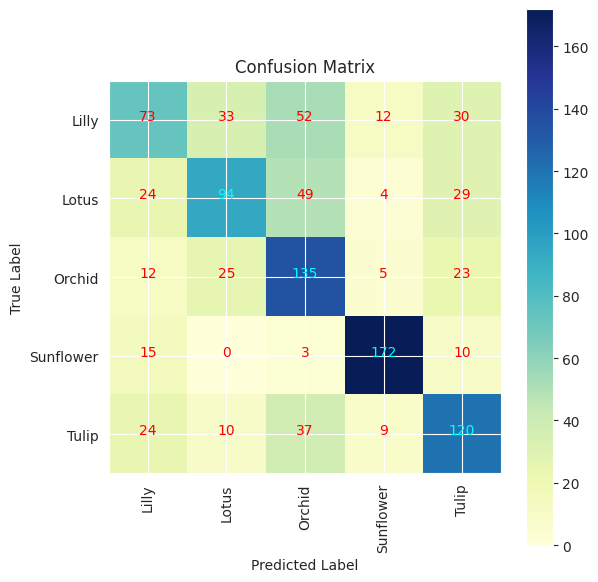

In [16]:
cm = confusion_matrix(test_data.classes, predicted_classes)
d1=test_data.class_indices
classes = list(d1.keys())
cmap= plt.cm.YlGnBu
plt.figure(figsize= (6, 6))
plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
plt.title('Confusion Matrix')
plt.colorbar(shrink=True)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 90)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'aqua' if cm[i, j] > thresh else 'red')
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
cm

In [17]:
train_score = cnn.evaluate(train_data, verbose= 1)
test_score = cnn.evaluate(test_data, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('*****************************')
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1000/1000 [==============================] - 18s 18ms/step - loss: 1.0260 - accuracy: 0.5840
Train Loss:  0.9458305239677429
Train Accuracy:  0.6194999814033508
*****************************
Test Loss:  1.0260393619537354
Test Accuracy:  0.5839999914169312


<div style="background-color: skyblue; color: #1434A4; border-radius: 32px; height: 50px">
    <center><h1 style="display:block; padding:7px">Pretrained VGG16</h1></center>
</div> 

In [18]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [19]:
vgg16NoTopFile='../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [20]:
vgg16=VGG16(include_top=False,input_shape=(224,224,3),weights=vgg16NoTopFile)
#from tensorflow.keras.applications.vgg16 import VGG16
#vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

**We can extract features from VGG16. Get the features directly from VGG16**

In [21]:
# Extract features from images using the VGG16 model
def extract_features(generator, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))  # Shape of the last convolutional layer in VGG16
    labels = np.zeros(shape=(sample_count))
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = vgg16.predict(inputs_batch)
        features[i * 32 : (i + 1) * 32] = features_batch
        labels[i * 32 : (i + 1) * 32] = np.argmax(labels_batch, axis=1)
        i += 1
        if i * 32 >= sample_count:
            break
    return features, labels

# Specify the directory and the number of samples for feature extraction
train_generator=ImageDataGenerator(rescale = 1./255) 
generator = train_generator.flow_from_directory("/kaggle/input/5-flower-types-classification-dataset/flower_images",target_size=(224,224),batch_size=32,
                                         class_mode='categorical',
                                         shuffle=True)
train_sample_count = 5000  # Total number of training samples

# Extract features from the training data
train_features, train_labels = extract_features(generator, train_sample_count)


Found 5000 images belonging to 5 classes.
1/1 [==============================] - 1s 992ms/step


In [22]:
class_names = [i for i in data.keys()]
class_names

['lilly', 'lotus', 'orchid', 'sunflower', 'tulip']

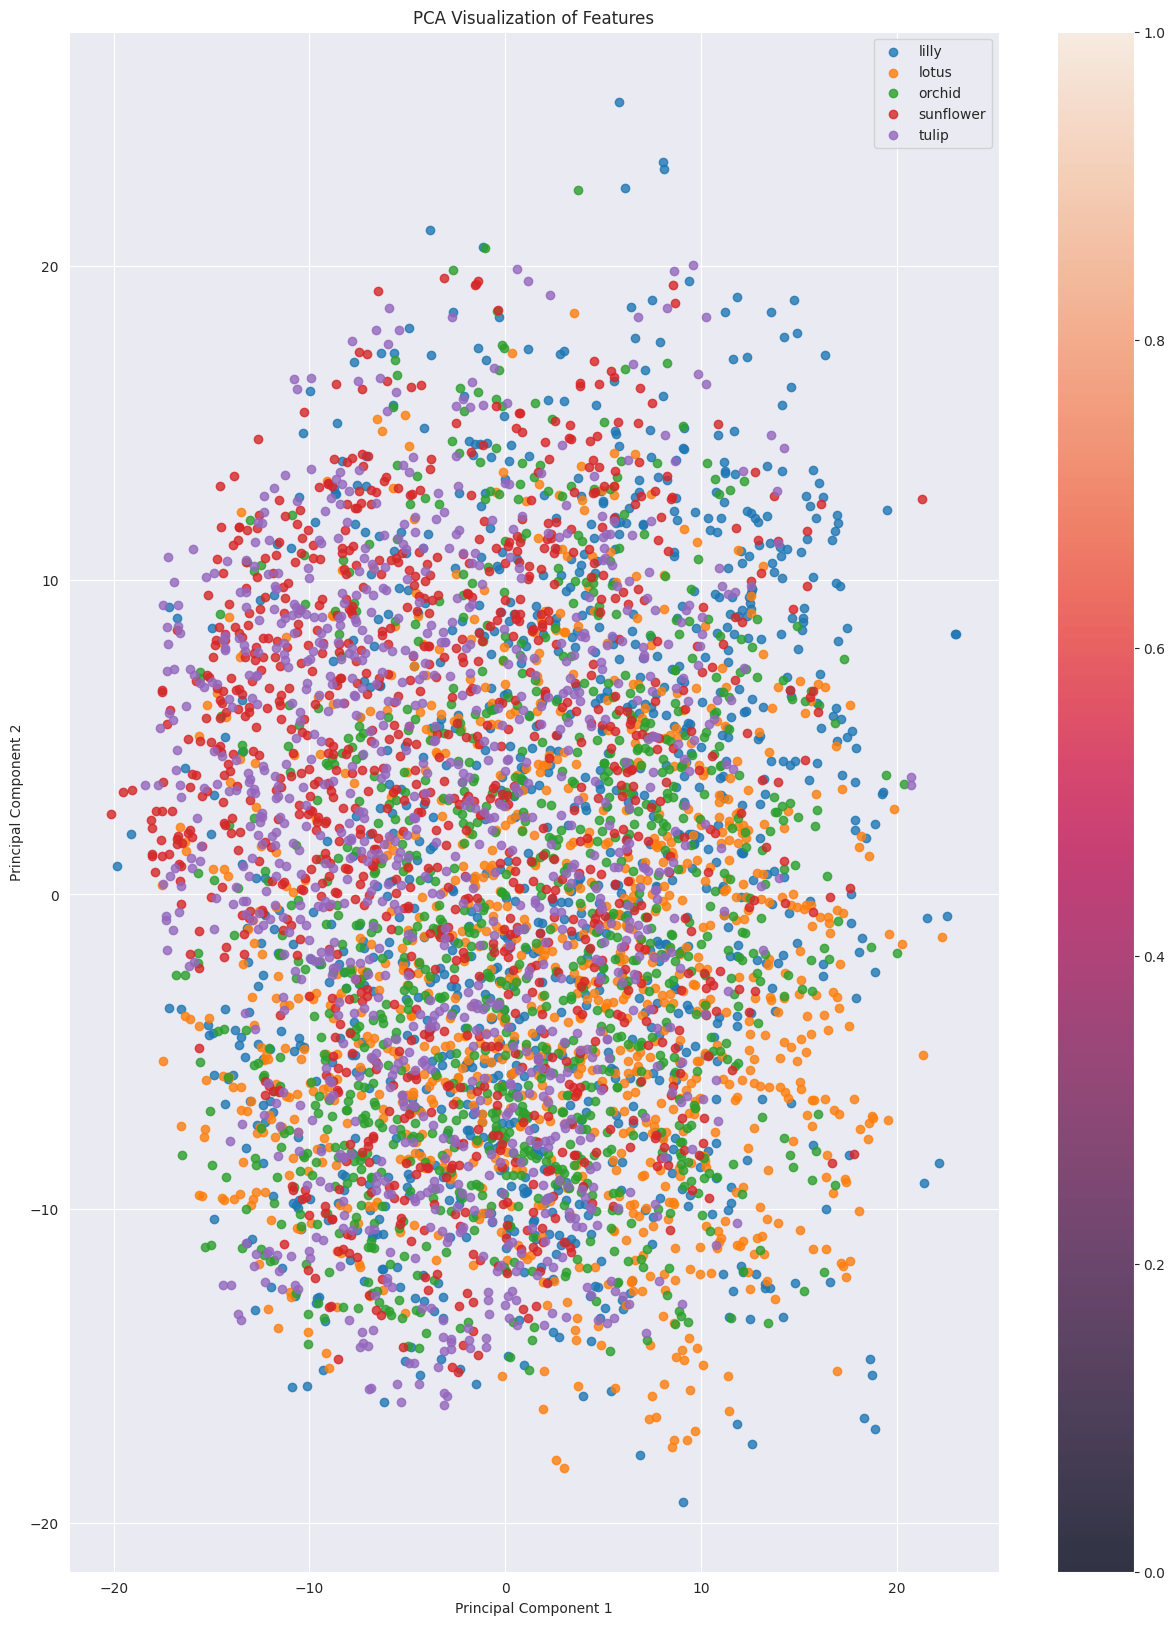

In [23]:
# Flatten the features for PCA
flatten_features = train_features.reshape(train_features.shape[0], -1)

# Apply PCA to the features
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flatten_features)

# Plot the PCA results
plt.figure(figsize=(15,20))
for i, class_name in enumerate(class_names):
    plt.scatter(pca_result[:, 0][train_labels == i][:1000], pca_result[:, 1][train_labels == i][:1000], label = class_name, alpha=0.8)
  #  plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train_labels, alpha=0.6,cmap='hsv')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Visualization of Features')
plt.legend()
plt.colorbar()
plt.show()

In [24]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (7, 7, 512)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, epochs=15,validation_split=0.2)

Epoch 1/15
125/125 [==============================] - 2s 7ms/step - loss: 0.8416 - accuracy: 0.7362 - val_loss: 0.3974 - val_accuracy: 0.8700
Epoch 2/15
125/125 [==============================] - 1s 5ms/step - loss: 0.1981 - accuracy: 0.9425 - val_loss: 0.3411 - val_accuracy: 0.8950
Epoch 3/15
125/125 [==============================] - 1s 5ms/step - loss: 0.0947 - accuracy: 0.9775 - val_loss: 0.2766 - val_accuracy: 0.9090
Epoch 4/15
125/125 [==============================] - 1s 5ms/step - loss: 0.0427 - accuracy: 0.9937 - val_loss: 0.2707 - val_accuracy: 0.9170
Epoch 5/15
125/125 [==============================] - 1s 5ms/step - loss: 0.0291 - accuracy: 0.9960 - val_loss: 0.2734 - val_accuracy: 0.9190
Epoch 6/15
125/125 [==============================] - 1s 5ms/step - loss: 0.0170 - accuracy: 0.9980 - val_loss: 0.2503 - val_accuracy: 0.9260
Epoch 7/15
125/125 [==============================] - 1s 6ms/step - loss: 0.0172 - accuracy: 0.9980 - val_loss: 0.2556 - val_accuracy: 0.9280
Epoch 

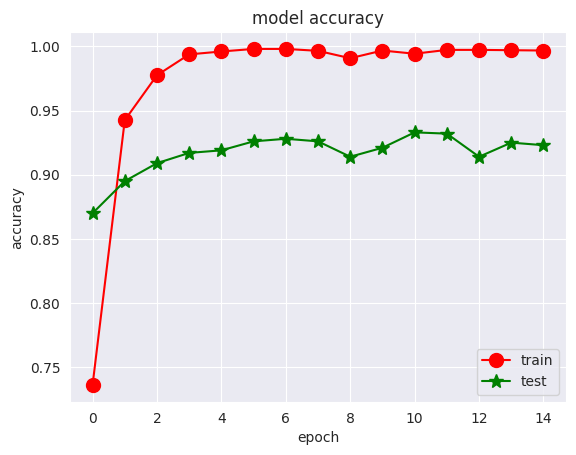

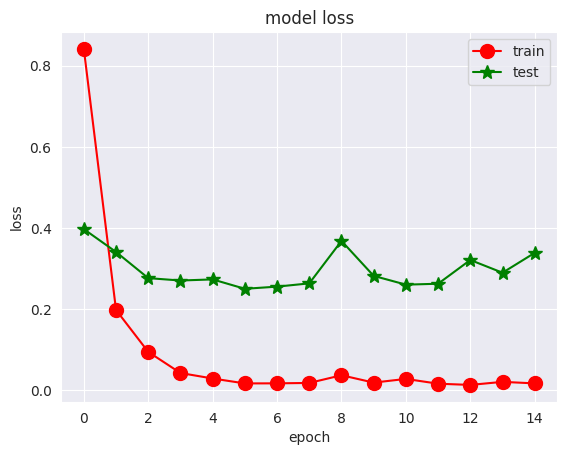

In [25]:
plot(model2)

<div style="background-color: skyblue; color: #1434A4; border-radius: 32px; height: 50px">
    <center><h1 style="display:block; padding:7px">END</h1></center>
</div> 